In [1]:
import numpy as np
import pandas as pd
import math
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from warnings import filterwarnings
filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
bl = pd.read_excel('bplm.xlsx')
bl.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
bl.shape

(5000, 14)

In [4]:
bl.columns = bl.columns.str.lower()
bl.columns = bl.columns.str.replace(' ','_')

In [5]:
bl['zip_code'] = bl['zip_code'].astype(str)
bl['id'] = bl['id'].astype(str)

In [6]:
bl1 = bl.loc[bl['personal_loan']==1]
bl0 = bl.loc[bl['personal_loan']==0]

bl1_samp = bl1.sample(400)
bl0_samp = bl0.sample(400)

bldfc = pd.concat([bl1_samp, bl0_samp])
bldfc['personal_loan'].value_counts()

0    400
1    400
Name: personal_loan, dtype: int64

In [7]:
bl_unseen = bldfc.sample(frac=0.20)

bl_train = bldfc.sample(frac=0.80)

In [8]:
bl_train.shape

(640, 14)

In [9]:
bl_unseen.shape

(160, 14)

In [10]:
bl_train.columns

Index(['id', 'age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'personal_loan', 'securities_account',
       'cd_account', 'online', 'creditcard'],
      dtype='object')

In [11]:
bl_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,640.0,45.245312,11.652673,23.0,35.00,45.5,55.00,66.0
experience,640.0,20.007812,11.575496,-1.0,9.00,20.0,30.00,41.0
income,640.0,101.318750,53.133708,8.0,53.75,101.0,143.00,203.0
family,640.0,2.531250,1.167756,1.0,1.00,3.0,4.00,4.0
ccavg,640.0,2.680313,2.030453,0.0,1.00,2.3,3.90,10.0
education,640.0,2.034375,0.817688,1.0,1.00,2.0,3.00,3.0
mortgage,640.0,78.407813,130.156981,0.0,0.00,0.0,136.25,612.0
personal_loan,640.0,0.484375,0.500147,0.0,0.00,0.0,1.00,1.0
securities_account,640.0,0.129688,0.336222,0.0,0.00,0.0,0.00,1.0
cd_account,640.0,0.153125,0.360390,0.0,0.00,0.0,0.00,1.0


In [12]:
#set target and preprocessing 
#Using all features

target = 'personal_loan'

features_all = ['age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'securities_account',
       'cd_account', 'online', 'creditcard']

#Training set

X = bl_train[features_all]
y = bl_train[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_a = scaler.transform(X_train)
X_test_a = scaler.transform(X_test)


#Unseen set

X_us = bl_unseen[features_all]
y_us = bl_unseen[target]

#Whole dataset
X_wh = bl[features_all]
y_wh = bl[target]

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        69
           1       0.87      0.88      0.87        59

    accuracy                           0.88       128
   macro avg       0.88      0.88      0.88       128
weighted avg       0.88      0.88      0.88       128

accuracy_train =  0.8750
accuracy_test =  0.8828
accuracy is =  0.8828125


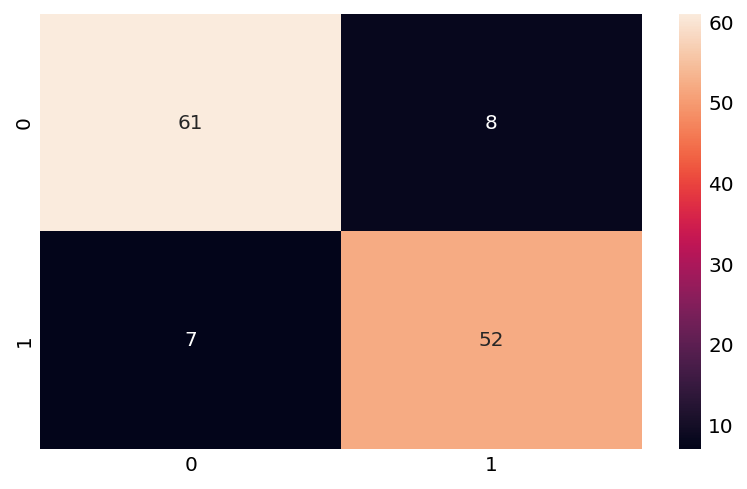

In [13]:
##Logistic Regression Model

#Training set
lg = LogisticRegression()
lg.fit(X_train, y_train)

y_pred = lg.predict(X_test)
y_pp = lg.predict_proba(X_test)[:, 1]

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');
print(classification_report(y_test, y_pred))
    
print('accuracy_train = {:7.4f}'.format(lg.score(X_train, y_train)))
print('accuracy_test = {:7.4f}'.format(lg.score(X_test, y_test)))
print('accuracy is = ', ac)

In [14]:
confusion_matrix()

array([[61,  8],
       [ 7, 52]])

              precision    recall  f1-score   support

           0       0.90      0.85      0.87        78
           1       0.86      0.91      0.89        82

    accuracy                           0.88       160
   macro avg       0.88      0.88      0.88       160
weighted avg       0.88      0.88      0.88       160

accuracy_unseen =  0.8812
accuracy is =  0.88125


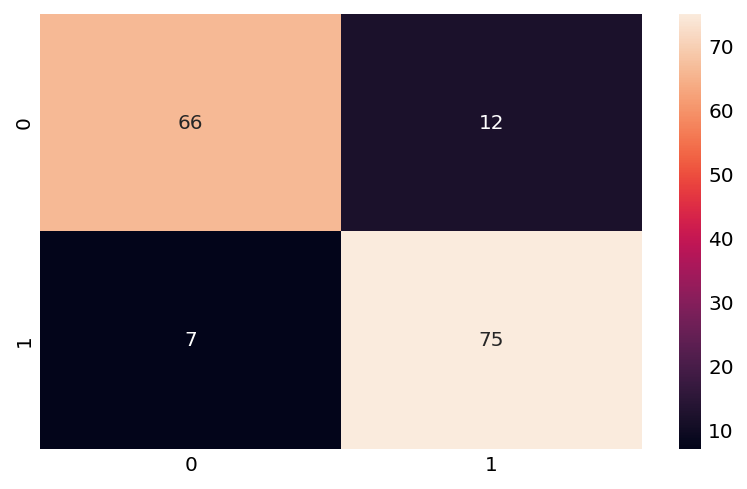

In [15]:
#Unseen set

lg.fit(X_us, y_us)

y_pred_us = lg.predict(X_us)
y_pp_us = lg.predict_proba(X_us)[:, 1]

ac_us = accuracy_score(y_us, y_pred_us)
cm_us = confusion_matrix(y_us, y_pred_us)
sns.heatmap(cm_us, annot=True, fmt='d');
print(classification_report(y_us, y_pred_us))
    
print('accuracy_unseen = {:7.4f}'.format(lg.score(X_us, y_us)))
print('accuracy is = ', ac_us)

In [16]:
cm_us

array([[66, 12],
       [ 7, 75]])